Importing and cleaning dataset

In [2]:
import yfinance as yf
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import numpy as np


# define the variable "btc" as the yf ticker function, and the argument as the BTC ticker.
btc = yf.Ticker("BTC-USD") 

# define the variable "btc_data" as the yf historical price retrieval function, with the start, end date and interval as arguments.
btc_data = btc.history(start="2020-01-01", end="2025-04-20", interval="1d")

# create the dataframe, using pandas function .DataFrame taking the variable "btc_data" as argument. This fills the dataframe with historical bitcoin prices as per defined in previous line. 
btc_df = pd.DataFrame(btc_data)

# clean up the dataset a little bit, removing volume, dividend and stock splits, as these are irrelevant.
btc_df = btc_df.drop(columns=["Volume", "Dividends", "Stock Splits"])

# Convert all price columns to integers (truncate decimals)
btc_df[['Open', 'High', 'Low', 'Close']] = btc_df[['Open', 'High', 'Low', 'Close']].astype(int)

# Convert DatetimeIndex to date only (remove time and timezone)
btc_df.index = btc_df.index.date

# print the head, or the start, of the dataframe.
btc_df

,Open,High,Low,Close
2020-01-01,7194,7254,7174,7200
2020-01-02,7202,7212,6935,6985
2020-01-03,6984,7413,6914,7344
2020-01-04,7345,7427,7309,7410
2020-01-05,7410,7544,7400,7411
...,...,...,...,...
2025-04-15,84539,86429,83598,83668
2025-04-16,83674,85428,83100,84033
2025-04-17,84030,85449,83749,84895
2025-04-18,84900,85095,84298,84450


In [3]:
# Create a complete date range from min to max date in the index
date_range = pd.date_range(start=btc_df.index.min(), end=btc_df.index.max(), freq='D')

# Check for missing dates
missing_dates = date_range.difference(btc_df.index)
if len(missing_dates) > 0:
    print("Missing dates:", missing_dates)
else:
    print("No missing dates")

No missing dates


Applying simple statistics to the dataset

In [4]:
# Identifying the five quartiles of the "Close" value, the mean, the median (50% value) and the standard deviation

btc_df["Close"].describe()


count      1936.000000
mean      39426.228306
std       24219.176782
min        4970.000000
25%       20238.500000
50%       35184.500000
75%       57233.750000
max      106146.000000
Name: Close, dtype: float64

In [5]:
# Finding the interquartile range (IQR) 

btc_df["Close"].quantile(0.75) - btc_df["Close"].quantile(0.25)

36995.25

In [6]:
# Identifying the spread of the "Close" value, showing us the range between the lowest and highest closing price.
max(btc_df["Close"]) - min(btc_df["Close"])

101176

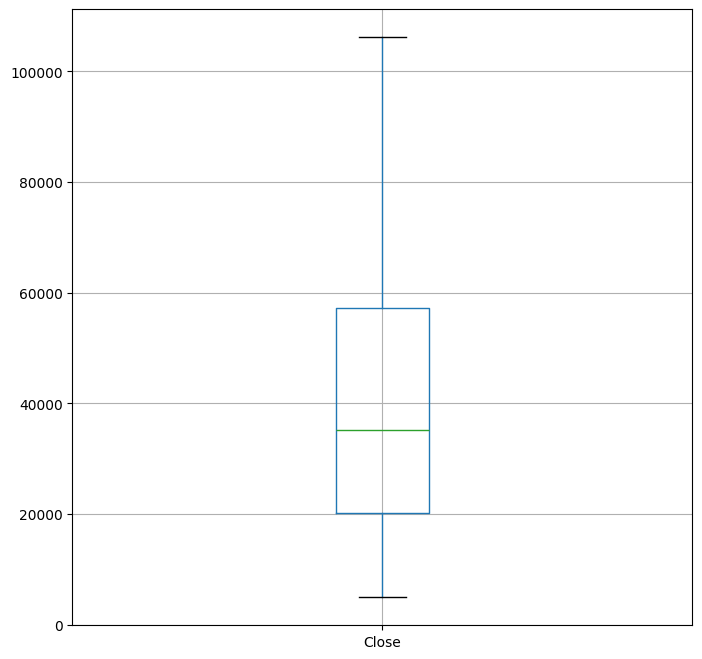

In [7]:
btc_df.boxplot(column="Close",
               return_type="axes",
               figsize=(8,8))

plt.show()

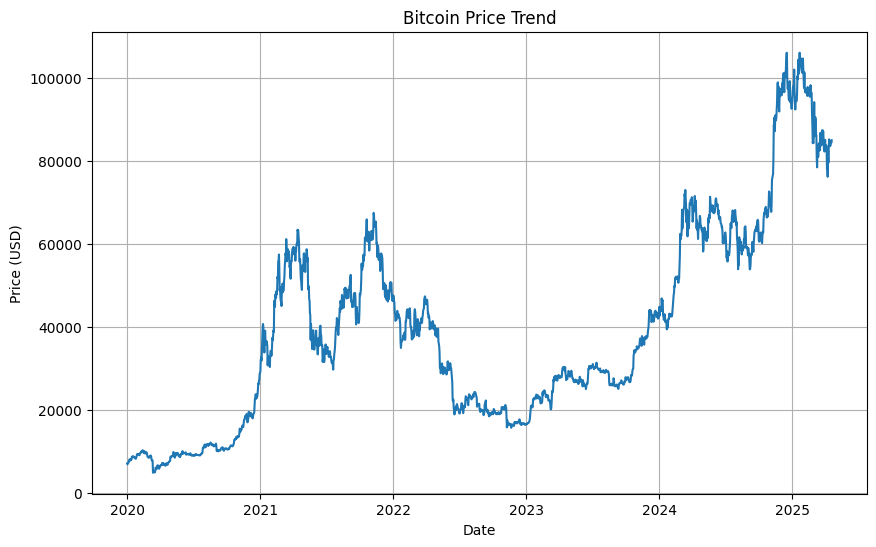

In [8]:
# Plot the closing prices
btc_df['Close'].plot(title='Bitcoin Price Trend', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.show()

In [9]:
# Calculate daily percentage returns
btc_df['Daily_Returns'] = btc_df['Close'].pct_change() * 100

In [10]:
# Calculate average daily return
avg_daily_return = btc_df['Daily_Returns'].mean()
print(f"Average Daily Return: {avg_daily_return:.2f}%")

Average Daily Return: 0.18%


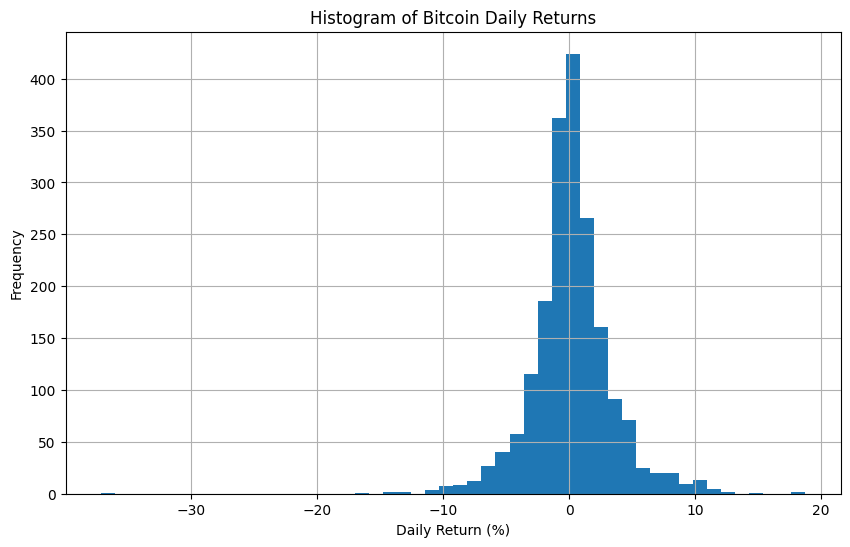

In [12]:
# Show daily returns in a histogram, this gives you a sense of how often BTC has violent price movements and how often it does nothing
btc_df['Daily_Returns'].hist(bins=50, figsize=(10, 6))
plt.title('Histogram of Bitcoin Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

            Close  Daily_Returns  Volatility
2025-04-15  83668      -1.033806    2.978764
2025-04-16  84033       0.436248    2.961830
2025-04-17  84895       1.025787    2.950174
2025-04-18  84450      -0.524177    2.804410
2025-04-19  85063       0.725873    2.747868


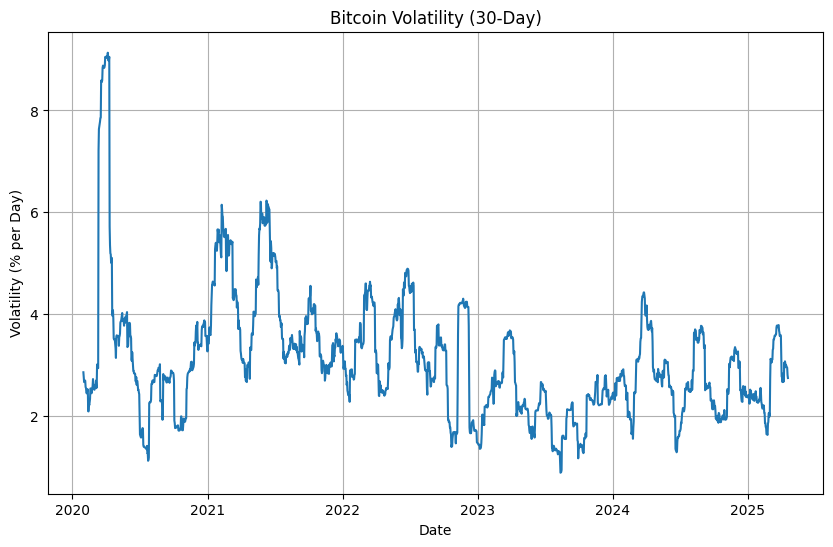

In [13]:
# Calculate volatility over a 30-day window
window = 30
btc_df['Volatility'] = btc_df['Daily_Returns'].rolling(window=window).std()

# Display the last few rows to check
print(btc_df[['Close', 'Daily_Returns', 'Volatility']].tail())

# Plot volatility
btc_df['Volatility'].plot(title='Bitcoin Volatility (30-Day)', figsize=(10, 6))
plt.xlabel('Date')
plt.ylabel('Volatility (% per Day)')
plt.grid(True)
plt.show()

Note that the volatility is displayed as a "% per day" in the y-axis. The reason it is shown as a percentage is because the standard deviation inherits the unit it is measured in from the data it is calculated on (daily average returns, which is in percentage). This means that a volatility of say 1 on the plot means that the daily returns vary by +-1% around their average. 